## Question 1

#### Report the following statistics for each hashtag, i.e. each file

Have a look at the data

In [1]:
import json

files = ["ECE219_tweet_data/tweets_#gohawks.txt",
         "ECE219_tweet_data/tweets_#gopatriots.txt",
         "ECE219_tweet_data/tweets_#nfl.txt",
         "ECE219_tweet_data/tweets_#patriots.txt",
         "ECE219_tweet_data/tweets_#sb49.txt",
         "ECE219_tweet_data/tweets_#superbowl.txt"]

with open(files[0], 'r') as file:
    first_line = file.readline()
    json_obj = json.loads(first_line)
    for key in json_obj:
        print(key)
    print('-' * 40)
    for key in json_obj:
        print(key + ':')
        print(json_obj[key])
        print('-' * 40)

firstpost_date
title
url
tweet
author
original_author
citation_date
metrics
highlight
type
citation_url
----------------------------------------
firstpost_date:
1419804875
----------------------------------------
title:
I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8
----------------------------------------
url:
http://twitter.com/Mich_Fit/status/549327579782840320
----------------------------------------
tweet:
{'contributors': None, 'truncated': False, 'text': 'I &lt;3 our defense! #GoHawks http://t.co/U1pcXpEsR8', 'in_reply_to_status_id': None, 'id': 549327579782840320, 'favorite_count': 1, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'retweeted': False, 'coordinates': None, 'entities': {'symbols': [], 'media': [{'expanded_url': 'http://twitter.com/Mich_Fit/status/549327579782840320/photo/1', 'sizes': {'large': {'h': 511, 'resize': 'fit', 'w': 511}, 'small': {'h': 340, 'resize': 'fit', 'w': 340}, 'medium': {'h': 511, 'resize': 'fit', 'w': 511}

In [2]:
max_times = {"ECE219_tweet_data/tweets_#gohawks.txt": 0,
             "ECE219_tweet_data/tweets_#gopatriots.txt": 0,
             "ECE219_tweet_data/tweets_#nfl.txt": 0,
             "ECE219_tweet_data/tweets_#patriots.txt": 0,
             "ECE219_tweet_data/tweets_#sb49.txt": 0,
             "ECE219_tweet_data/tweets_#superbowl.txt": 0}

min_times = {"ECE219_tweet_data/tweets_#gohawks.txt": 0,
             "ECE219_tweet_data/tweets_#gopatriots.txt": 0,
             "ECE219_tweet_data/tweets_#nfl.txt": 0,
             "ECE219_tweet_data/tweets_#patriots.txt": 0,
             "ECE219_tweet_data/tweets_#sb49.txt": 0,
             "ECE219_tweet_data/tweets_#superbowl.txt": 0}

In [3]:
# helper funtion to report statistics for one file
# at the same time get max and min times for each file

def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = 2000000000
        total_followers = 0
        total_retweets = 0
        for line in lines:
            json_obj = json.loads(line)
            if(json_obj['citation_date'] > max_time):
                max_time = json_obj['citation_date']
            if(json_obj['citation_date'] < min_time):
                min_time = json_obj['citation_date']
                
            total_followers = total_followers + json_obj['author']['followers']
            
            total_retweets = total_retweets + json_obj['metrics']['citations']['total']
                
        avg_tweets_per_hour = len(lines) / (max_time - min_time) * 60 * 60
        avg_followers_per_tweet = total_followers / len(lines)
        avg_retweets_per_tweet = total_retweets / len(lines)
        
        max_times[filename] = max_time
        min_times[filename] = min_time
        
    print('-' * 40)
    print(filename)
    print("Average number of tweets per hour:")
    print(avg_tweets_per_hour)
    
    print("Average number of followers per tweet:")
    print(avg_followers_per_tweet)
    
    print("Average number of retweets per tweet:")
    print(avg_retweets_per_tweet)

##### • Average number of tweets per hour
##### • Average number of followers of users posting the tweets per tweet
##### • Average number of retweets per tweet

In [4]:
for file in files:
    report_statistics(file)

----------------------------------------
ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:
292.48785062173687
Average number of followers per tweet:
2217.9237355281984
Average number of retweets per tweet:
2.0132093991319877
----------------------------------------
ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:
40.954698006061946
Average number of followers per tweet:
1427.2526051635405
Average number of retweets per tweet:
1.4081919101697078
----------------------------------------
ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:
397.0213901819841
Average number of followers per tweet:
4662.37544523693
Average number of retweets per tweet:
1.5344602655543254
----------------------------------------
ECE219_tweet_data/tweets_#patriots.txt
Average number of tweets per hour:
750.89426460689
Average number of followers per tweet:
3280.4635616550277
Average number of retweets per tweet:
1.7852871288476946
--------------

## Question 2

#### Plot "number of tweets in hour" over time for #SuperBowl and #NFL (a histogram with 1-hour bins)

In [5]:
def get_num_in_hour(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        max_time = max_times[filename]
        min_time = min_times[filename]

        total_hours = round((max_time - min_time) / (60 * 60)) + 1
        X = range(total_hours)
        Y = [0] * total_hours

        for line in lines:
            json_obj = json.loads(line)
            index = round((json_obj['citation_date'] - min_time) / (60 * 60))
            Y[index] = Y[index] + 1

        return X, Y

In [6]:
import matplotlib.pyplot as plt

def plot_num_in_hour(X, Y, name):
    plt.figure(figsize=(10,6))
    plt.bar(X, Y, width=X[1]-X[0])
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('number of tweets in hours for ' + name)
    plt.show()

#SuperBowl

In [7]:
SuperBowl_X, SuperBowl_Y = get_num_in_hour(files[5])

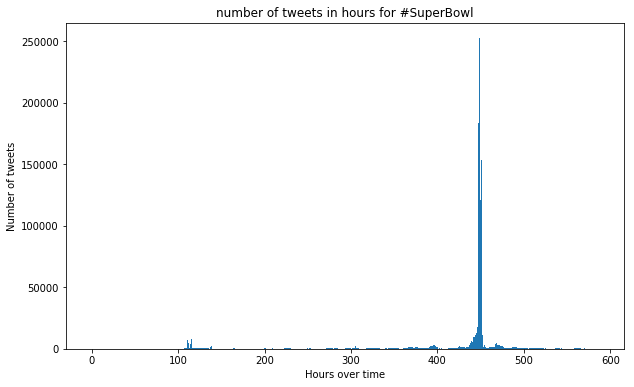

In [8]:
plot_num_in_hour(SuperBowl_X, SuperBowl_Y, "#SuperBowl")

#NFL

In [9]:
NFL_X, NFL_Y = get_num_in_hour(files[2])

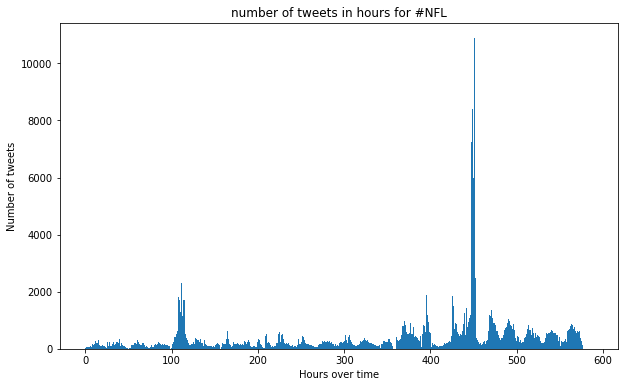

In [10]:
plot_num_in_hour(NFL_X, NFL_Y, "#NFL")

## Question 3

#### For each hashtag, train a linear regression model. For each model, report the model's Mean Squared Error (MSE) and R-squared mesure. Also, analyze the significance of each feature using t-test and p-value.

In [13]:
import datetime
import pytz
import numpy as np

pst_tz = pytz.timezone('America/Los_Angeles')

def extract_feature(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = max_times[filename]
        min_time = min_times[filename]
        
        total_hours = round((max_time - min_time) / (60 * 60)) + 1
        
        num_tweets = 0
        num_retweets = 0
        num_followers = 0
        max_num_followers = 0
        time_windows = []
        
        for hour in range(total_hours):
            datetime_object_in_pst_timezone = datetime.datetime.fromtimestamp(min_time + hour * 60 * 60, pst_tz)
            time_of_day = datetime_object_in_pst_timezone.hour
            time_windows.append([num_tweets, num_retweets, num_followers, max_num_followers, time_of_day])
            
        for line in lines:
            json_obj = json.loads(line)
            index = round((json_obj['citation_date'] - min_time) / (60 * 60))
            time_windows[index][0] = time_windows[index][0] + 1 # update num_tweets
            time_windows[index][1] = time_windows[index][1] + json_obj['metrics']['citations']['total'] # update num_retweets
            time_windows[index][2] = time_windows[index][2] + json_obj['author']['followers'] # update num_followers
            time_windows[index][3] = max(time_windows[index][3], json_obj['author']['followers']) # update max_num_followers
            
        return np.array(time_windows)

#gohawks

In [14]:
time_windows_gohawks = extract_feature(files[0])

gohawks_X = time_windows_gohawks[0:-1,:]
gohawks_Y = time_windows_gohawks[1:,0]

In [18]:
from statsmodels.api import OLS

lr_gohawks = OLS(gohawks_Y, gohawks_X).fit()

print(lr_gohawks.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     279.5
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          4.57e-151
Time:                        19:47:20   Log-Likelihood:                -4540.0
No. Observations:                 578   AIC:                             9090.
Df Residuals:                     573   BIC:                             9112.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1645      0.119      9.748      0.0

In [19]:
from statsmodels.api import tools
gohawks_predict = lr_gohawks.predict(gohawks_X)
gohawks_mse = tools.eval_measures.mse(gohawks_Y, gohawks_predict)

print("MSE for #gohawks:", gohawks_mse)

MSE for #gohawks: 389086.61457122036


#gopatriots

In [20]:
time_windows_gopatriots = extract_feature(files[1])

gopatriots_X = time_windows_gopatriots[0:-1,:]
gopatriots_Y = time_windows_gopatriots[1:,0]

In [21]:
lr_gopatriots = OLS(gopatriots_Y, gopatriots_X).fit()

print(lr_gopatriots.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     94.54
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           2.14e-72
Time:                        20:03:12   Log-Likelihood:                -3905.5
No. Observations:                 574   AIC:                             7821.
Df Residuals:                     569   BIC:                             7843.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.5580      0.298     -5.227      0.0

In [22]:
gopatriots_predict = lr_gopatriots.predict(gopatriots_X)
gopatriots_mse = tools.eval_measures.mse(gopatriots_Y, gopatriots_predict)

print("MSE for #gopatriots:", gopatriots_mse)

MSE for #gopatriots: 47576.188942486355


#nfl

In [23]:
time_windows_nfl = extract_feature(files[2])

nfl_X = time_windows_nfl[0:-1,:]
nfl_Y = time_windows_nfl[1:,0]

In [24]:
lr_nfl = OLS(nfl_Y, nfl_X).fit()

print(lr_nfl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     315.4
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          5.03e-163
Time:                        20:06:04   Log-Likelihood:                -4428.3
No. Observations:                 587   AIC:                             8867.
Df Residuals:                     582   BIC:                             8889.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4814      0.114      4.208      0.0

In [25]:
nfl_predict = lr_nfl.predict(nfl_X)
nfl_mse = tools.eval_measures.mse(nfl_Y, nfl_predict)

print("MSE for #nfl:", nfl_mse)

MSE for #nfl: 209013.3222443561


#patriots

In [26]:
time_windows_patriots = extract_feature(files[3])

patriots_X = time_windows_patriots[0:-1,:]
patriots_Y = time_windows_patriots[1:,0]

In [27]:
lr_patriots = OLS(patriots_Y, patriots_X).fit()

print(lr_patriots.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     232.8
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          2.92e-136
Time:                        20:10:34   Log-Likelihood:                -5386.3
No. Observations:                 587   AIC:                         1.078e+04
Df Residuals:                     582   BIC:                         1.080e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0036      0.085     11.838      0.0

In [28]:
patriots_predict = lr_patriots.predict(patriots_X)
patriots_mse = tools.eval_measures.mse(patriots_Y, patriots_predict)

print("MSE for #patriots:", patriots_mse)

MSE for #patriots: 5466476.76932625


#sb49

In [29]:
time_windows_sb49 = extract_feature(files[4])

sb49_X = time_windows_sb49[0:-1,:]
sb49_Y = time_windows_sb49[1:,0]

In [30]:
lr_sb49 = OLS(sb49_Y, sb49_X).fit()

print(lr_sb49.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     475.2
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          7.28e-202
Time:                        20:15:48   Log-Likelihood:                -5662.4
No. Observations:                 582   AIC:                         1.133e+04
Df Residuals:                     577   BIC:                         1.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0912      0.088     12.395      0.0

In [31]:
sb49_predict = lr_sb49.predict(sb49_X)
sb49_mse = tools.eval_measures.mse(sb49_Y, sb49_predict)

print("MSE for #sb49:", sb49_mse)

MSE for #sb49: 16530174.167058893


#superbowl

In [32]:
time_windows_superbowl = extract_feature(files[5])

superbowl_X = time_windows_superbowl[0:-1,:]
superbowl_Y = time_windows_superbowl[1:,0]

In [33]:
lr_superbowl = OLS(superbowl_Y, superbowl_X).fit()

print(lr_superbowl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          4.34e-189
Time:                        20:23:59   Log-Likelihood:                -6069.3
No. Observations:                 586   AIC:                         1.215e+04
Df Residuals:                     581   BIC:                         1.217e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.5533      0.111     23.094      0.0

In [34]:
superbowl_predict = lr_superbowl.predict(superbowl_X)
superbowl_mse = tools.eval_measures.mse(superbowl_Y, superbowl_predict)

print("MSE for #superbowl:", superbowl_mse)

MSE for #superbowl: 58037195.52955217


## Question 4

#### Design a regression model using any features from the paper you find or other new features you may find useful for this problem. Fit your model on the data of each hashtag and report fitting MSE and significance of features.

##### New Features (with reference to paper)
• Author Count  
• Mentions Count  
• Passivity   
• Friends Count  
• Ranking Score

In [42]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
          'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

def get_account_days(tweet):
    account_create_date = tweet['tweet']['user']['created_at'].split(' ')
    post_date = tweet['tweet']['created_at'].split(' ')
    datetime_account = datetime.datetime(int(account_create_date[5]),
                                         months[account_create_date[1]],
                                         int(account_create_date[2]))
    datetime_post = datetime.datetime(int(post_date[5]),
                                      months[post_date[1]],
                                      int(post_date[2]))
    return (datetime_post - datetime_account).days

In [59]:
def extract_feature_v2(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = max_times[filename]
        min_time = min_times[filename]
        
        total_hours = round((max_time - min_time) / (60 * 60)) + 1
        
        authors = []
        unique_authors = 0
        mentions = 0
        passivity = 0.0
        num_friends = 0
        ranking_score = 0.0
        time_windows = []
        
        for hour in range(total_hours):
            authors.append(set())
            time_windows.append([unique_authors, mentions, passivity, num_friends, ranking_score])
            
        for line in lines:
            json_obj = json.loads(line)
            index = round((json_obj['citation_date'] - min_time) / (60 * 60))
            authors[index].add(json_obj['author']['name'])
            time_windows[index][1] = time_windows[index][1] + len(json_obj['tweet']['entities']['user_mentions'])
            
            account_days = get_account_days(json_obj)
            num_tweets = json_obj['tweet']['user']['followers_count']
            time_windows[index][2] = time_windows[index][2] + (account_days / (1.0 + num_tweets))
            
            time_windows[index][3] = time_windows[index][3] + json_obj['tweet']['user']['friends_count']
            time_windows[index][4] = time_windows[index][4] + json_obj['metrics']['ranking_score']
            
        for i in range(total_hours):
            time_windows[i][0] = len(authors[i])
            
        return np.array(time_windows)

#gohawks

In [60]:
time_windows_gohawks_v2 = extract_feature_v2(files[0])

gohawks_X_v2 = time_windows_gohawks_v2[0:-1,:]
gohawks_Y_v2 = time_windows_gohawks_v2[1:,0]

In [61]:
lr_gohawks_v2 = OLS(gohawks_Y_v2, gohawks_X_v2).fit()

print(lr_gohawks_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     388.4
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          2.20e-181
Time:                        23:15:33   Log-Likelihood:                -4332.0
No. Observations:                 578   AIC:                             8674.
Df Residuals:                     573   BIC:                             8696.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5622      0.317     -1.776      0.0

In [62]:
gohawks_predict_v2 = lr_gohawks_v2.predict(gohawks_X_v2)
gohawks_mse_v2 = tools.eval_measures.mse(gohawks_Y_v2, gohawks_predict_v2)

print("MSE for #gohawks:", gohawks_mse_v2)

MSE for #gohawks: 189443.90866502284


#gopatriots

In [63]:
time_windows_gopatriots_v2 = extract_feature_v2(files[1])

gopatriots_X_v2 = time_windows_gopatriots_v2[0:-1,:]
gopatriots_Y_v2 = time_windows_gopatriots_v2[1:,0]

In [64]:
lr_gopatriots_v2 = OLS(gopatriots_Y_v2, gopatriots_X_v2).fit()

print(lr_gopatriots_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     243.5
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          9.00e-139
Time:                        23:15:59   Log-Likelihood:                -3653.6
No. Observations:                 574   AIC:                             7317.
Df Residuals:                     569   BIC:                             7339.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.7448      0.653     10.332      0.0

In [65]:
gopatriots_predict_v2 = lr_gopatriots_v2.predict(gopatriots_X_v2)
gopatriots_mse_v2 = tools.eval_measures.mse(gopatriots_Y_v2, gopatriots_predict_v2)

print("MSE for #gopatriots:", gopatriots_mse_v2)

MSE for #gopatriots: 19777.756852996485


#nfl

In [66]:
time_windows_nfl_v2 = extract_feature_v2(files[2])

nfl_X_v2 = time_windows_nfl_v2[0:-1,:]
nfl_Y_v2 = time_windows_nfl_v2[1:,0]

In [67]:
lr_nfl_v2 = OLS(nfl_Y_v2, nfl_X_v2).fit()

print(lr_nfl_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          2.60e-146
Time:                        23:16:32   Log-Likelihood:                -4279.5
No. Observations:                 587   AIC:                             8569.
Df Residuals:                     582   BIC:                             8591.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1784      0.251      0.712      0.4

In [68]:
nfl_predict_v2 = lr_nfl_v2.predict(nfl_X_v2)
nfl_mse_v2 = tools.eval_measures.mse(nfl_Y_v2, nfl_predict_v2)

print("MSE for #nfl:", nfl_mse_v2)

MSE for #nfl: 125882.01140723113


#patriots

In [69]:
time_windows_patriots_v2 = extract_feature_v2(files[3])

patriots_X_v2 = time_windows_patriots_v2[0:-1,:]
patriots_Y_v2 = time_windows_patriots_v2[1:,0]

In [70]:
lr_patriots_v2 = OLS(patriots_Y_v2, patriots_X_v2).fit()

print(lr_patriots_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     318.8
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          5.18e-164
Time:                        23:19:02   Log-Likelihood:                -5237.7
No. Observations:                 587   AIC:                         1.049e+04
Df Residuals:                     582   BIC:                         1.051e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.2517      0.813     -2.770      0.0

In [71]:
patriots_predict_v2 = lr_patriots_v2.predict(patriots_X_v2)
patriots_mse_v2 = tools.eval_measures.mse(patriots_Y_v2, patriots_predict_v2)

print("MSE for #patriots:", patriots_mse_v2)

MSE for #patriots: 3294323.2070698887


#sb49

In [72]:
time_windows_sb49_v2 = extract_feature_v2(files[4])

sb49_X_v2 = time_windows_sb49_v2[0:-1,:]
sb49_Y_v2 = time_windows_sb49_v2[1:,0]

In [73]:
lr_sb49_v2 = OLS(sb49_Y_v2, sb49_X_v2).fit()

print(lr_sb49_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     774.0
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          4.02e-253
Time:                        23:23:44   Log-Likelihood:                -5399.4
No. Observations:                 582   AIC:                         1.081e+04
Df Residuals:                     577   BIC:                         1.083e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4376      0.428      5.697      0.0

In [74]:
sb49_predict_v2 = lr_sb49_v2.predict(sb49_X_v2)
sb49_mse_v2 = tools.eval_measures.mse(sb49_Y_v2, sb49_predict_v2)

print("MSE for #sb49:", sb49_mse_v2)

MSE for #sb49: 6694560.066255934


#superbowl

In [75]:
time_windows_superbowl_v2 = extract_feature_v2(files[5])

superbowl_X_v2 = time_windows_superbowl_v2[0:-1,:]
superbowl_Y_v2 = time_windows_superbowl_v2[1:,0]

In [76]:
lr_superbowl_v2 = OLS(superbowl_Y_v2, superbowl_X_v2).fit()

print(lr_superbowl_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     332.4
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          8.87e-168
Time:                        23:32:18   Log-Likelihood:                -5880.4
No. Observations:                 586   AIC:                         1.177e+04
Df Residuals:                     581   BIC:                         1.179e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2658      0.337     -0.789      0.4

In [77]:
superbowl_predict_v2 = lr_superbowl_v2.predict(superbowl_X_v2)
superbowl_mse_v2 = tools.eval_measures.mse(superbowl_Y_v2, superbowl_predict_v2)

print("MSE for #superbowl:", superbowl_mse_v2)

MSE for #superbowl: 30459584.157288235
